In [1]:
import numpy as np
import math

# Qupulse

In [2]:
from qupulse.pulses import TablePT, FunctionPT, PointPT, SequencePT
from qupulse.pulses import RepetitionPT, ForLoopPT
from qupulse.serialization import PulseStorage, DictBackend
%matplotlib notebook
from qupulse.pulses.plotting import plot

/home/ws/lr1740/.local/lib/python3.8/site-packages/qupulse/utils/types.py:28: UserWarning: gmpy2 not found. Using fractions.Fraction as fallback. Install gmpy2 for better performance.time_from_float might produce slightly different results
  warnings.warn('gmpy2 not found. Using fractions.Fraction as fallback. Install gmpy2 for better performance.'


## Hardcoded pulse

<IPython.core.display.Javascript object>


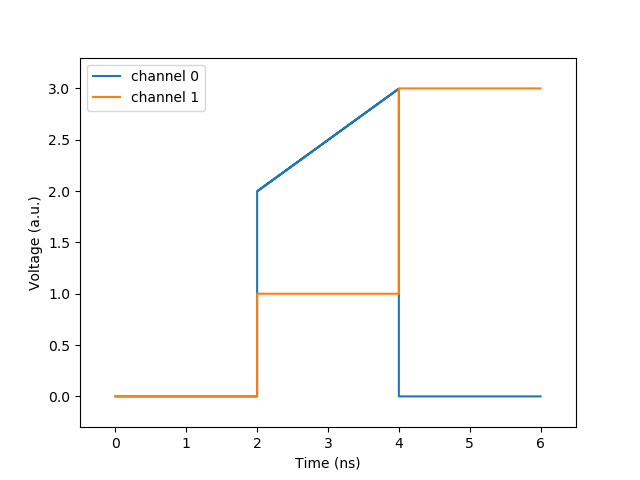

<class 'matplotlib.figure.Figure'>


In [87]:
entry_list1 = [(0, 0), #Define the pulse sequence for channel1
             (2, 2, "hold"),
             (4, 3, "linear"),
             (6, 0, "jump")]
entry_list2 = [(0, 0), #Define the pulse sequence for channel2
             (2, 1, "hold"),
             (4, 3, "hold"),
             (6, 0, "hold")]

entries = {0: entry_list1, 1: entry_list2} #Create a channel dict which is understood by qupulse
template = TablePT(entries) #Create the pulse 

fig = plot(template, sample_rate = 100)
print(type(fig))

## Parametrized Pulse

### Simple pulse

<IPython.core.display.Javascript object>


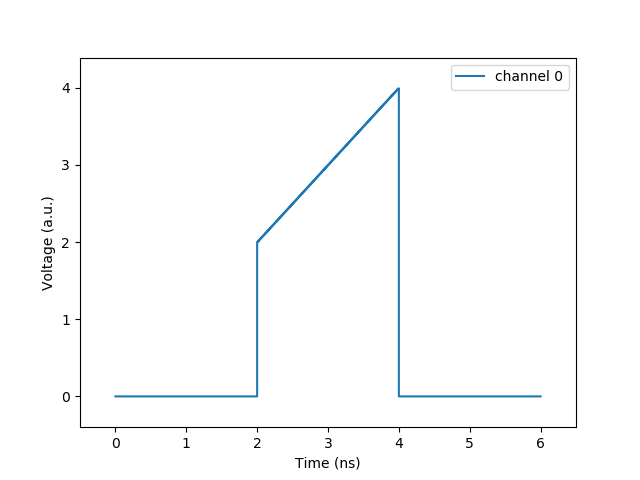

In [46]:
param_entry_list = [(0, 0),
                   ("ta", "va", "hold"),
                   ("tb", "vb", "linear"),
                    ("tend", 0, "jump")]

param_entries = {0: param_entry_list}

param_template = TablePT(param_entries)

parameters = {'ta': 2,
              'va': 2,
              'tb': 4,
              'vb': 4,
              'tend': 6}

_ = plot(param_template, parameters, sample_rate=100)

### Mirror Pulse

<IPython.core.display.Javascript object>


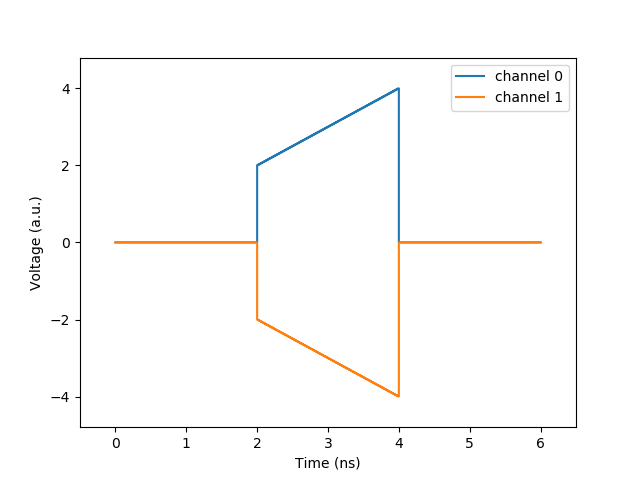

In [47]:
param_entry_list1 = [(0, 0),
                   ("ta", "va", "hold"),
                   ("tb", "vb", "linear"),
                    ("tend", 0, "jump")]

param_entry_list2 = [(0, 0),
                   ("ta", "-va", "hold"),
                   ("tb", "-vb", "linear"),
                    ("tend", 0, "jump")]

param_entries = {0: param_entry_list1, 
                 1: param_entry_list2}

param_template = TablePT(param_entries)

parameters = {'ta': 2,
              'va': 2,
              'tb': 4,
              'vb': 4,
              'tend': 6}

_ = plot(param_template, parameters, sample_rate=100)

### Pulse with expressions

<IPython.core.display.Javascript object>


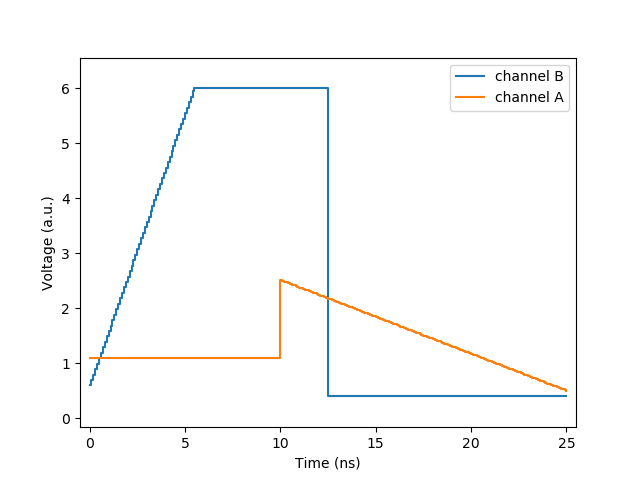

In [41]:
expr_pulse = TablePT({'A': [(0,     'a_0'),
                            ('t_1', 'a_0 + sqrt(theta)', 'hold'),
                            ('t_2', 'Abs(x_0 - y_0)', 'linear')],
                      'B': [(0,               'b_0'),
                            ('t_1*(b_0/a_0)', 'b_1', 'linear'),
                            ('t_2 / 2',           'b_2')]})
_ = plot(expr_pulse, dict(a_0=1.1, theta=2, x_0=0.5, y_0=1, t_1=10, t_2=25, b_0=0.6, b_1=6, b_2=0.4))

### Function Pulse

<IPython.core.display.Javascript object>


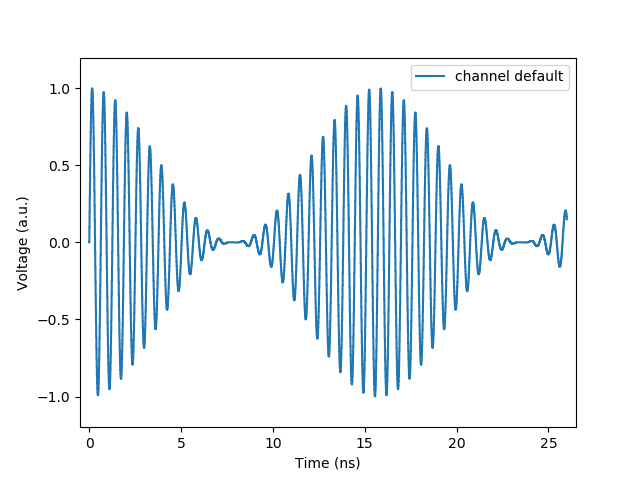

In [85]:
func_pulse = FunctionPT("sin(t*20 / omega) * cos(t/5)**2","2 * 13")
_ = plot(func_pulse,{"omega" : 2}, sample_rate = 100)

### Point Pulse

{'B', 'A'}


<IPython.core.display.Javascript object>


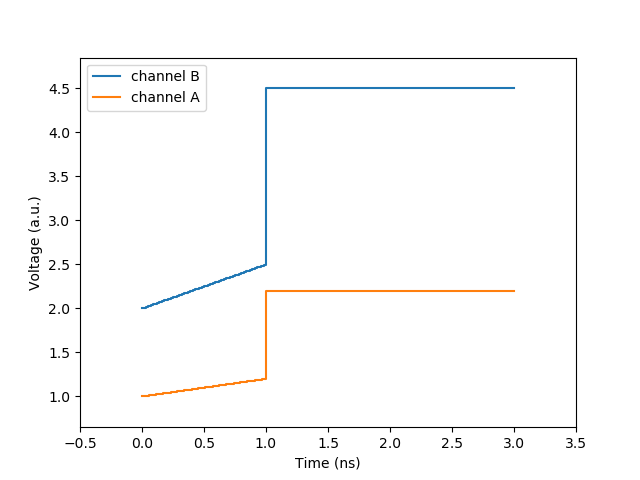

In [95]:
point_template = PointPT([(0,   'v_0'),
                          (1,   'v_1', 'linear'),
                          ('t', 'v_0+v_1', 'jump')],
                         channel_names=('A', 'B'))

print(point_template.defined_channels)

parameters = dict(t=3,
                  v_0=np.array([1,2]),
                  v_1=np.array([1.2, 2.5]))

_ = plot(point_template, parameters, sample_rate=100)

## Pulse Sequences

### Combine two existing pulses

sequence parameters: {'t_2', 't', 'v_1', 'v_0'}
sequence measurements: {'M'}


<IPython.core.display.Javascript object>


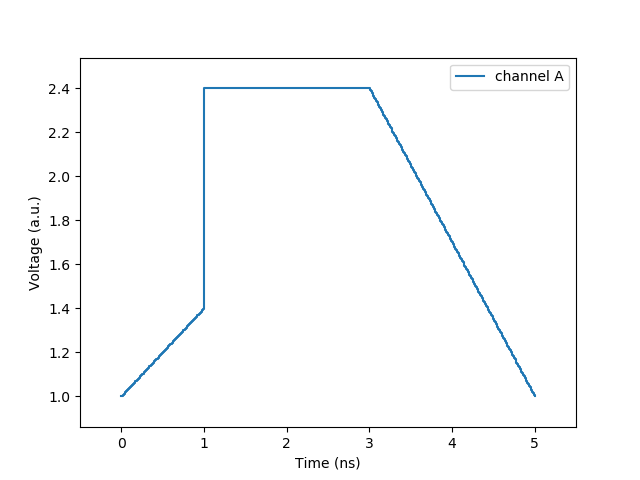

In [4]:
# create our atomic "low-level" PointPTs
first_point_pt = PointPT([(0,   'v_0'),
                          (1,   'v_1', 'linear'),
                          ('t', 'v_0+v_1', 'jump')],
                         channel_names={'A'},
                         measurements={('M', 1, 't-1')})
second_point_pt = PointPT([(0, 'v_0+v_1'),
                           ('t_2', 'v_0', 'linear')],
                          channel_names={'A'},
                          measurements={('M', 0, 1)})

# define the SequencePT
sequence_pt = SequencePT(first_point_pt, second_point_pt)

print("sequence parameters: {}".format(sequence_pt.parameter_names))
print("sequence measurements: {}".format(sequence_pt.measurement_names))
parameters = {"t" : 3, "t_2" : 2, "v_0" : 1, "v_1" : 1.4}
_ = plot(sequence_pt, parameters, sample_rate=100)

### Repeat a pulse

repetition parameters: {'v_0', 't', 'n_rep', 'v_1'}
repetition measurements: {'M'}


<IPython.core.display.Javascript object>


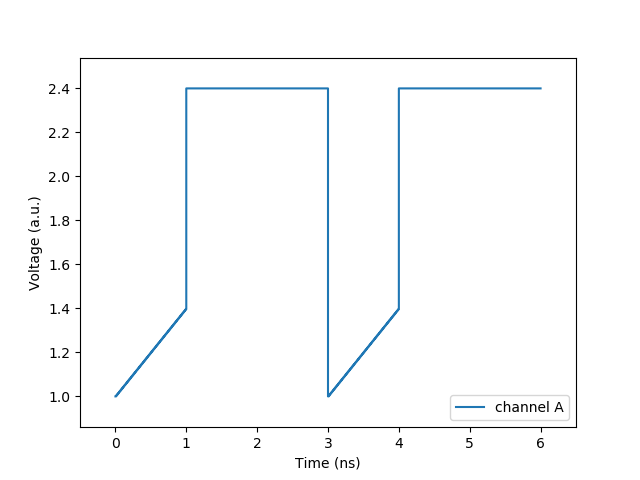

In [24]:
repetition_pt = RepetitionPT(first_point_pt, "n_rep")

print("repetition parameters: {}".format(repetition_pt.parameter_names))
print("repetition measurements: {}".format(repetition_pt.measurement_names))

# let's plot to see the results
parameters['n_rep'] = 2 # add a value for our n_rep parameter
_ = plot(repetition_pt, parameters, sample_rate=100)

### For Loop a Pulse

for loop parameters: {'t_start', 'v_1', 'v_0', 't_end'}
for loop measurements: {'M'}


<IPython.core.display.Javascript object>


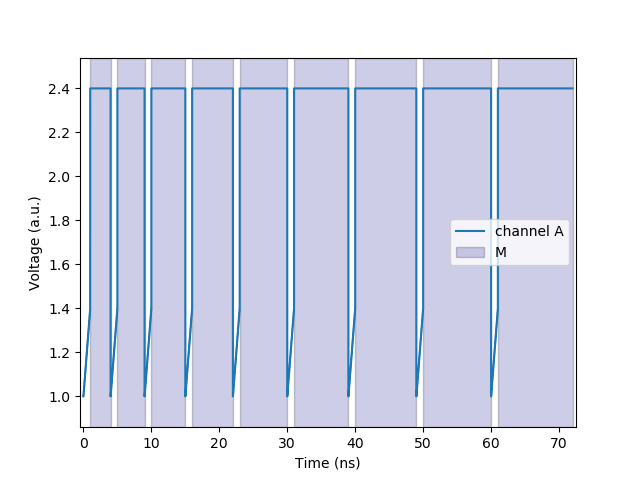

In [5]:
for_loop_pt = ForLoopPT(first_point_pt, 't', ('t_start', 't_end', 1))

print("for loop parameters: {}".format(for_loop_pt.parameter_names))
print("for loop measurements: {}".format(for_loop_pt.measurement_names))

# plot it
parameters['t_start'] = 4
parameters['t_end'] = 13
_ = plot(for_loop_pt, parameters, sample_rate=100, plot_measurements = {"M"})

### For looping a pulse train

for loop parameters: {'t_start', 't_end', 'v_0', 'n_rep', 'v_1'}
for loop measurements: {'M'}


<IPython.core.display.Javascript object>


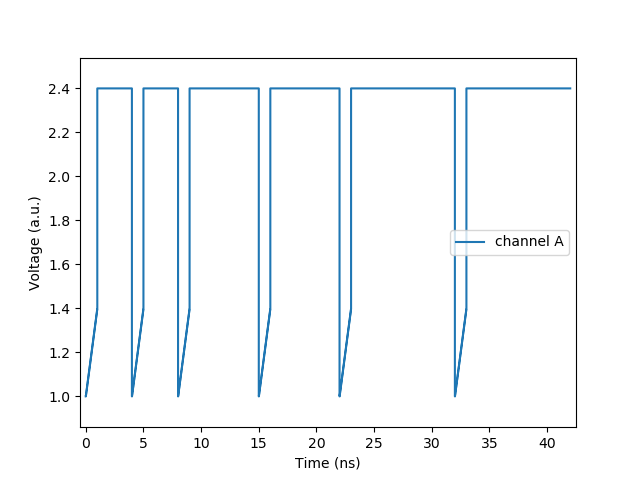

In [26]:
for_loop_pt = ForLoopPT(repetition_pt, 't', ('t_start', 't_end', 3))

print("for loop parameters: {}".format(for_loop_pt.parameter_names))
print("for loop measurements: {}".format(for_loop_pt.measurement_names))

# plot it
parameters['t_start'] = 4
parameters['t_end'] = 13
_ = plot(for_loop_pt, parameters, sample_rate=100)

## Storing a pulse sequence

In [17]:
dict_backend = DictBackend()
dict_pulse_storage = PulseStorage(dict_backend)

func_pulse = FunctionPT("sin(omega * t)", "time", 
                      identifier='my_pulse', channel = "booga snooga")

dict_pulse_storage['my_pulse'] = func_pulse

print(type(dict_backend.storage))

<class 'dict'>


## Loading a pulse sequence

<IPython.core.display.Javascript object>


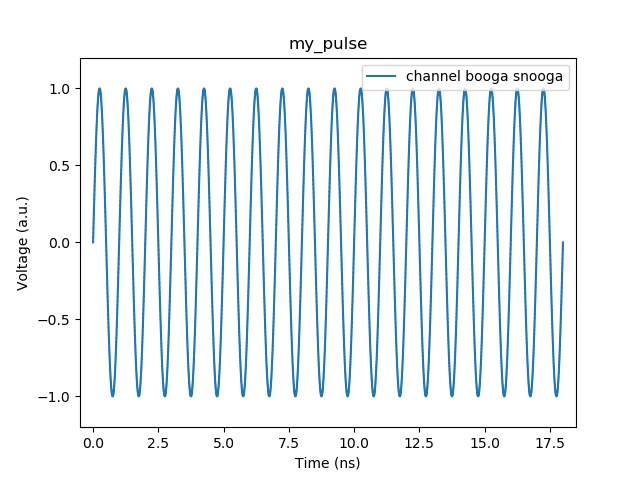

Loading the same pulse multiple times gives you the same object


In [18]:
import math

sine = dict_pulse_storage['my_pulse']

_ = plot(sine, {'omega': 2*math.pi, "time" : 18}, sample_rate=1000, show=False)

if sine is dict_pulse_storage['my_pulse']:
    print('Loading the same pulse multiple times gives you the same object')

## Instantiating a pulse

<IPython.core.display.Javascript object>


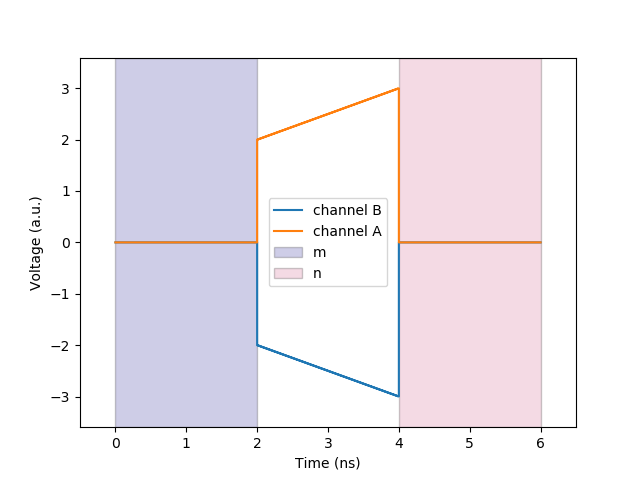

In [13]:
template = TablePT(entries={'A': [(0, 0),
                                  ('ta', 'va', 'hold'),
                                  ('tb', 'vb', 'linear'),
                                  ('tend', 0, 'jump')],
                            'B': [(0, 0),
                                  ('ta', '-va', 'hold'),
                                  ('tb', '-vb', 'linear'),
                                  ('tend', 0, 'jump')]}, measurements=[('m', 0, 'ta'),
                                                                       ('n', 'tb', 'tend-tb')])

parameters = {'ta': 2,
              'va': 2,
              'tb': 4,
              'vb': 3,
              'tc': 5,
              'td': 11,
              'tend': 6}
_ = plot(template, parameters, sample_rate=100, show=False, plot_measurements={'m', 'n'})

In [16]:
program = template.create_program(parameters=parameters,
                                  channel_mapping={'A': 'A', 'B': 'B'})
print(type(program))
print(program)
print('Defined on', program[0].waveform.defined_channels)
print(program.get_measurement_windows())

<class 'qupulse._program._loop.Loop'>
LOOP 1 times:
  ->EXEC <qupulse._program.waveforms.MultiChannelWaveform object at 0x7fa0dc3c4eb0> 1 times
Defined on {'B', 'A'}
{'m': (array([0.]), array([2.])), 'n': (array([4.]), array([2.]))}


## Combining multi-channel templates

<IPython.core.display.Javascript object>


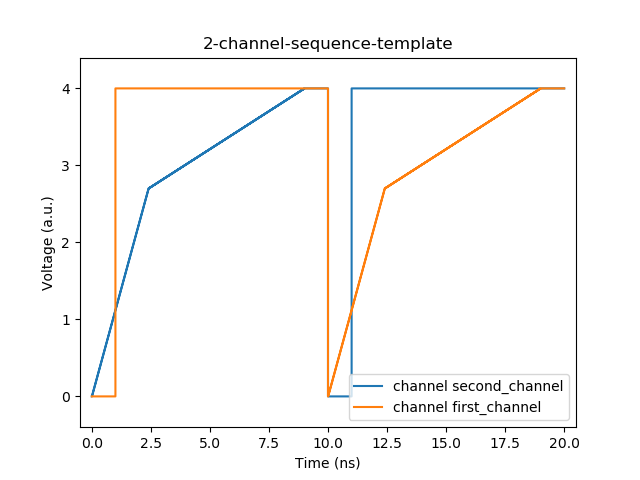

The number of channels in sequence_template is 2.


In [23]:
table_template = TablePT(identifier='2-channel-table-template',
                         entries={'first_channel' : [(0, 0),
                                                     (1, 4),
                                                     ('foo', 'bar'),
                                                     (10, 0)],
                                  'second_channel': [(0, 0),
                                                     ('foo', 2.7, 'linear'),
                                                     (9, 'bar', 'linear')]}
                        )
sequence_template = SequencePT(
    (table_template, dict(foo='1.2 * hugo', bar='hugo ** 2')),
    (table_template, dict(foo='1.2 * hugo', bar='hugo ** 2'), {'first_channel': 'second_channel',
                                                               'second_channel': 'first_channel'}), 
    identifier = '2-channel-sequence-template'
)

plot(sequence_template, dict(hugo=2), sample_rate=100)
print("The number of channels in sequence_template is {}.".format(sequence_template.num_channels))

## Defining measurement windows

{'t_meas', 'm'}
{'M', 'N'}
[('M', 0, 't_meas'), ('N', 0, 't_meas/2')]
for loop parameters: {'t_start', 'v_1', 'v_0', 't_end'}
for loop measurements: {'M'}


<IPython.core.display.Javascript object>


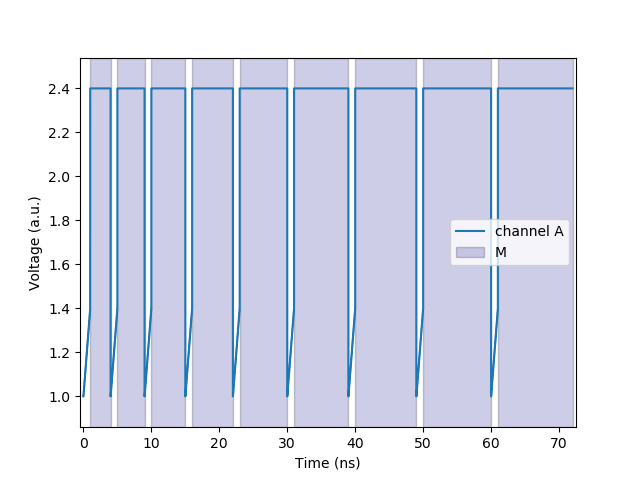

In [7]:
measured_pt = PointPT([(0, 'm'),
                      ('t_meas', 'm')],
                      channel_names=('RF_X', 'RF_Y'),
                      measurements=[('M', 0, 't_meas'), ('N', 0, 't_meas/2')])
print(measured_pt.parameter_names)
print(measured_pt.measurement_names)
print(measured_pt.measurement_declarations)

for_loop_pt = ForLoopPT(first_point_pt, 't', ('t_start', 't_end', 1))

print("for loop parameters: {}".format(for_loop_pt.parameter_names))
print("for loop measurements: {}".format(for_loop_pt.measurement_names))

# plot it
parameters['t_start'] = 4
parameters['t_end'] = 13
_ = plot(for_loop_pt, parameters, sample_rate=100, plot_measurements = {"M"})

{'dbz_fid', 'N', 'M', 'Kartoffelmessung'}
{'t_meas', 'm'}


<IPython.core.display.Javascript object>


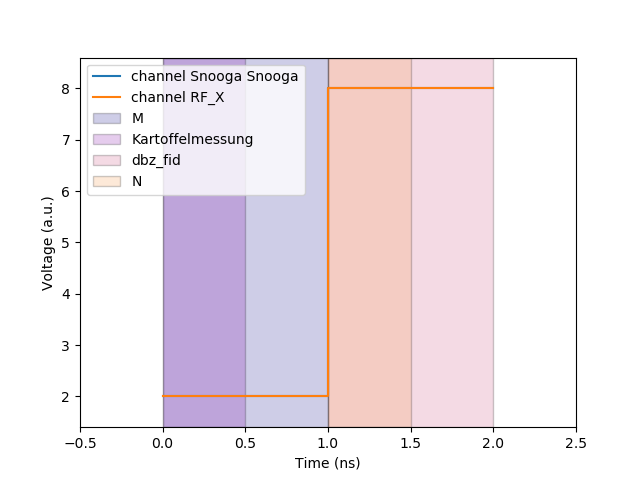

In [44]:
from qupulse.pulses import SequencePT

my_complicated_pulse = SequencePT((measured_pt, {"m" : 2}, {"N" : "Kartoffelmessung"}, {"RF_Y" : "Snooga Snooga"}),
                                  (measured_pt, {'M': 'dbz_fid'}, {"RF_Y" : "Snooga Snooga"})) #implicite mapping
print(my_complicated_pulse.measurement_names)
print(my_complicated_pulse.parameter_names)
_ = plot(my_complicated_pulse
         , {"m" : 8, "t_meas" : 1}, sample_rate=100, show=False, plot_measurements={'N', "dbz_fid", 'M', "Kartoffelmessung"})


# Qkit

## Starting the environment

In [17]:
import qkit
from datetime import date
qkit.cfg['run_id'] = 'Testing %s' % date.today()
qkit.cfg['user'] = 'Julian'
qkit.start()
import qkit.measure.samples_class as sc

import numpy as np
from numpy.random import rand
from qkit.measure.semiconductor.spin_excite import Exciting
from qkit.measure.semiconductor.readout_backends import RO_test_backend
import numpy as np
import matplotlib.pyplot as plt
import logging

readout = RO_test_backend.RO_backend()
excitation = Exciting(readout_backend = readout)
excitation.qviewkit_singleInstance = True
excitation.set_x_parameters(np.arange(1, 257), "la banane", lambda val: True, "V")

v_source = qkit.instruments.create("bill_virtual", "virtual_voltage_source")

INFO:root: ---------- LOGGING STARTED ---------- 
INFO:root:Set instruments dir to /home/ws/lr1740/Dokumente/Doktorarbeit/Code/Semi_Software/qkit/qkit/drivers
INFO:root:qkit.core.s_init.S14_setup_directories : "None" is not a valid path for user_instruments_dir, setting to None
INFO:root:Not checking for updates.


Starting QKIT framework ... -> qkit.core.startup
Loading module ... S10_logging.py
Loading module ... S14_setup_directories.py
Loading module ... S16_available_modules.py
Loading module ... S20_check_for_updates.py
Loading module ... S25_info_service.py


INFO:root:loading service: file info database (fid)


Loading module ... S30_qkit_start.py
Loading module ... S65_load_RI_service.py
Loading module ... S70_load_visa.py
Loading module ... S80_load_file_service.py
Loading module ... S85_init_measurement.py


Widget Javascript not detected.  It may not be installed or enabled properly.


Loading module ... S98_started.py
Loading module ... S99_init_user.py


In [19]:
excitation._ro_backend.measurement_settings["M1"]["measurement_count"] = 256
excitation._ro_backend.measurement_settings["M1"]["sample_count"] = 100
excitation._ro_backend.measurement_settings["M1"]["averages"] = 30
excitation._ro_backend.measurement_settings["M2"]["measurement_count"] = 256
excitation._ro_backend.measurement_settings["M2"]["sample_count"] = 200
excitation._ro_backend.measurement_settings["M2"]["averages"] = 800
excitation._ro_backend.measurement_settings["M3"]["measurement_count"] = 256
excitation._ro_backend.measurement_settings["M3"]["sample_count"] = 300
excitation._ro_backend.measurement_settings["M3"]["averages"] = 15
excitation.measure1D()

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


INFO:root:qkit.measure.measurement_base: Dataset for coordinate 'la banane' was already created.
INFO:root:qkit.measure.measurement_base: Dataset for coordinate 'la banane' was already created.
INFO:root:qkit.measure.measurement_base: Dataset for coordinate 'la banane' was already created.
INFO:root:qkit.measure.measurement_base: Dataset for coordinate 'la banane' was already created.
INFO:root:qkit.measure.measurement_base: Dataset for coordinate 'la banane' was already created.
INFO:root:qkit.measure.measurement_base: Dataset for coordinate 'la banane' was already created.
INFO:root:qkit.measure.measurement_base: Dataset for coordinate 'la banane' was already created.
INFO:root:qkit.measure.measurement_base: Dataset for coordinate 'la banane' was already created.
INFO:root:qkit.measure.measurement_base: Dataset for coordinate 'la banane' was already created.
INFO:root:qkit.measure.measurement_base: Dataset for coordinate 'la banane' was already created.
INFO:root:qkit.measure.measure

/home/ws/lr1740/Dokumente/Doktorarbeit/Code/Semi_Software/qkit/qkit/data/Testing_2021-07-30/Julian/QX2JZ9_1D_labanane/QX2JZ9_1D_labanane.h5


INFO:root: -> plotting dataset: b'la_banane'
INFO:root: -> plotting dataset: b'm1.r'
INFO:root: -> plotting dataset: b'm1.x'
INFO:root: -> plotting dataset: b'm1.y'
INFO:root: -> plotting dataset: b'm2.a'
INFO:root: -> plotting dataset: b'm2.b'
INFO:root: -> plotting dataset: b'm2.c'
INFO:root: -> plotting dataset: b'm3.hubbi'
INFO:root: -> plotting dataset: b'measurement'
INFO:root: -> plotting dataset: b'settings'
INFO:root: -> plotting dataset: b'static_voltages'


Plots saved in /home/ws/lr1740/Dokumente/Doktorarbeit/Code/Semi_Software/qkit/qkit/data/Testing_2021-07-30/Julian/QX2JZ9_1D_labanane/images


In [8]:
def get_funky_data():
    return np.sin(next(iterator)*np.pi/20)/1000

def get_funky_tracedata(length):
    return np.sin(np.linspace(0, np.pi, length))

def get_noisy_tracedata(length):
    data = np.sin(np.linspace(0, np.pi, length))
    noise = np.random.normal(0, 0.1, length)
    return data + noise

def run(a):
    pass

excitation.set_get_value_func(get_funky_data)
excitation.set_get_tracedata_func(get_funky_tracedata)

Plots saved in /home/ws/lr1740/Dokumente/Doktorarbeit/Code/Semi_Software/qkit/qkit/data/Testing_2021-07-28/Julian/QWY7KR_1D_labanane/images


## Qupulse decoder

for loop parameters: {'t_start', 't_step', 'v_0', 't_end', 'v_1'}
for loop measurements: {'M'}
<class 'qupulse.expressions.ExpressionScalar'>
<class 'str'>
t_start


<IPython.core.display.Javascript object>


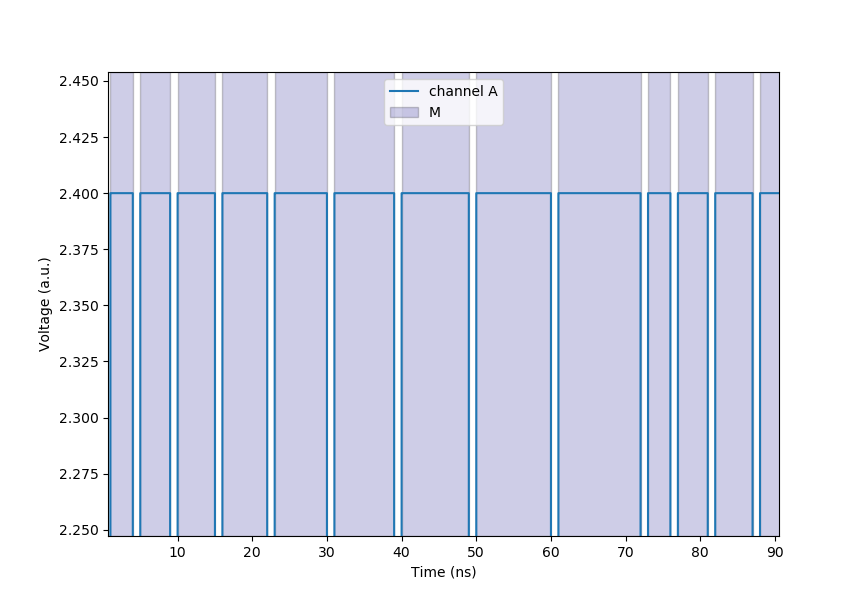

In [15]:
parameters = {"t" : 3, "t_2" : 2, "v_0" : 1, "v_1" : 1.4}

first_point_pt = PointPT([(0,   'v_0'),
                          (1,   'v_1', 'linear'),
                          ('t', 'v_0+v_1', 'jump')],
                         channel_names={'A'},
                         measurements={('M', 1, 't-1')})

for_loop_pt = ForLoopPT(first_point_pt, 't', ('t_start', 't_end', "t_step"))

repeated_for_loop_pt = RepetitionPT(for_loop_pt, 'n_rep')

print("for loop parameters: {}".format(for_loop_pt.parameter_names))
print("for loop measurements: {}".format(for_loop_pt.measurement_names))
print(type(for_loop_pt.loop_range.start))
print(type(for_loop_pt.loop_range.start.original_expression))
print(for_loop_pt.loop_range.start.original_expression)
# plot it
parameters["n_rep"] = 3
parameters["t_step"] = 1
parameters['t_start'] = 4
parameters['t_end'] = 13
_ = plot(repeated_for_loop_pt, parameters, sample_rate=100, plot_measurements = {"M"})

In [16]:
from qkit.measure.semiconductor.spin_excite import Qupulse_decoder
decoder = Qupulse_decoder(repeated_for_loop_pt, parameters)
print(decoder.loop_start_value)
print(decoder.loop_stop_value)
print(decoder.loop_stop_name)
print(decoder.loop_step_value)
print(decoder.loop_step_name)

AttributeError: 'RepetitionPulseTemplate' object has no attribute 'loop_range'

In [23]:
print(type(first_point_pt))
print(type(for_loop_pt))
print(type(parameters))
class A:
    def __init__(self):
        self.a = 0
        self.b = 0
instance = A()
print(instance.a)
del(instance.a)
print(instance.a)

<class 'qupulse.pulses.point_pulse_template.PointPulseTemplate'>
<class 'qupulse.pulses.loop_pulse_template.ForLoopPulseTemplate'>
<class 'dict'>
0


AttributeError: 'A' object has no attribute 'a'

# Args and Kwargs

In [52]:
def build_list(print_ass = False, *args):
    a = []
    for element in args:
        a.append(element)
    if print_ass:
        print("ass")
    return a

print(build_list(True, 1,2))

ass
[1, 2]


In [58]:
my_dict = {"a" : 1, "b" : 2}
print(*my_dict)


a b


SyntaxError: can't use starred expression here (<ipython-input-58-b48b5a8b9f34>, line 3)

# Sonstiges

In [1]:
import numpy as np
print(np.sin(np.linspace(0, np.pi, 100)))

[0.00000000e+00 3.14473221e-03 6.28943332e-03 9.43407223e-03
 1.25786178e-02 1.57230391e-02 1.88673048e-02 2.20113839e-02
 2.51552454e-02 2.82988581e-02 3.14421909e-02 3.45852128e-02
 3.77278927e-02 4.08701994e-02 4.40121020e-02 4.71535694e-02
 5.02945704e-02 5.34350740e-02 5.65750492e-02 5.97144649e-02
 6.28532900e-02 6.59914936e-02 6.91290446e-02 7.22659119e-02
 7.54020646e-02 7.85374716e-02 8.16721019e-02 8.48059245e-02
 8.79389084e-02 9.10710227e-02 9.42022363e-02 9.73325184e-02
 1.00461838e-01 1.03590164e-01 1.06717465e-01 1.09843712e-01
 1.12968871e-01 1.16092914e-01 1.19215809e-01 1.22337524e-01
 1.25458030e-01 1.28577295e-01 1.31695289e-01 1.34811980e-01
 1.37927338e-01 1.41041332e-01 1.44153931e-01 1.47265105e-01
 1.50374822e-01 1.53483052e-01 1.56589764e-01 1.59694928e-01
 1.62798512e-01 1.65900487e-01 1.69000820e-01 1.72099483e-01
 1.75196443e-01 1.78291671e-01 1.81385136e-01 1.84476807e-01
 1.87566653e-01 1.90654645e-01 1.93740751e-01 1.96824941e-01
 1.99907185e-01 2.029874

In [4]:
ndev = 10
['amplitude_%i' % i for i in range(min(5,ndev))]

['amplitude_0', 'amplitude_1', 'amplitude_2', 'amplitude_3', 'amplitude_4']

In [15]:
print([["amplitude%i"%i, "Loch Ness"] for i in range(5)])    

[['amplitude0', 'Loch Ness'], ['amplitude1', 'Loch Ness'], ['amplitude2', 'Loch Ness'], ['amplitude3', 'Loch Ness'], ['amplitude4', 'Loch Ness']]


In [6]:
# using property class
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32

    # getter
    def get_temperature(self):
        print("Getting value...")
        return self._temperature

    # setter
    def set_temperature(self, value):
        print("Setting value...")
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible")
        self._temperature = value

    # creating a property object
    temperature = property(get_temperature, set_temperature)
    
human = Celsius(37)

print(human.temperature)

print(human.to_fahrenheit())

human.temperature = -300

Setting value...
Getting value...
37
Getting value...
98.60000000000001
Setting value...


ValueError: Temperature below -273.15 is not possible

In [10]:
# Using @property decorator
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32

    @property
    def temperature(self):
        print("Getting value...")
        return self._temperature

    @temperature.setter
    def temperature(self, value):
        print("Setting value...")
        if value < -273.15:
            raise ValueError("Temperature below -273 is not possible")
        self._temperature = value


# create an object
human = Celsius(37)

print(human.temperature)

print(human.to_fahrenheit())

coldest_thing = Celsius(-300)

Setting value...
Getting value...
37
Getting value...
98.60000000000001
Setting value...


ValueError: Temperature below -273 is not possible

In [18]:
arr = 2
numpy_arr = np.atleast_1d(arr)
contig_arr = np.ascontiguousarray(numpy_arr)
print(numpy_arr)
print(type(numpy_arr))
print(contig_arr)
print(type(contig_arr))

[2]
<class 'numpy.ndarray'>
[2]
<class 'numpy.ndarray'>


In [28]:
a = [[1,2,3]]
a = np.array(a)
shape = a.shape
print(len(shape))
print(shape)
print(a.ndim)

2
(1, 3)
2


In [30]:
b = np.array([[1,1,1],[0,0,0]])
avg_b = np.average(b, axis = 0)
print(avg_b)

[0.5 0.5 0.5]


In [11]:
c = np.array([1,1,1])
d = np.array([2,2,2])

e = np.array([c+d, c+d])
print(e)
print(type(e))
print(type(e[0]))

[array([3, 3, 3]), array([3, 3, 3])]
<class 'list'>
<class 'numpy.ndarray'>


In [6]:
my_dict = {"a 2" : "Mongodom"}
print(my_dict["a 2"])

Mongodom


In [10]:
def do_twice(func):
    func()
    func()
    
@do_twice
def say_hi():
    print("hi")

hi
hi


In [9]:
measurement_settings = {"M1":{"sampling_rate" : 110e9,
                               "measurement_count" : 64,
                               "sample_count" : 128,
                               "data_nodes" : ["x", "y", "r"],
                               "unit" : "V",
                               "active" : True
                               },
                       "M2":{"sampling_rate" : 110e9,
                               "measurement_count" : 64,
                               "sample_count" : 128,
                               "data_nodes" : ["a", "b", "c"],
                               "unit" : "V",
                               "active" : True
                               }}

def active_measurements(func):
    for measurement in measurement_settings.keys():
        if measurement_settings[measurement]["active"]:
            func(measurement)


def active_measurement_nodes(func):
    for measurement in measurement_settings.keys():
        if measurement_settings[measurement]["active"]:
            for node in measurement_settings[measurement]["data_nodes"]:
                func(measurement, node)
total_iterations = 10
def return_iterations():
    total_iterations = 10
    @active_measurements
    def increase_iterations(measurement):
        global total_iterations
        total_iterations += measurement_settings[measurement]["measurement_count"]
    return total_iterations
print(return_iterations())
@active_measurement_nodes
def say_hi(measurement, node):
    print("%s.%s" % (measurement, node))
    
say_hi("a", "b")

10
M1.x
M1.y
M1.r
M2.a
M2.b
M2.c


TypeError: 'NoneType' object is not callable

In [16]:
do_twice()

TypeError: do_twice() missing 1 required positional argument: 'func'

In [34]:
def little_check():
    for element in range(3):
        return element
little_check()

0

In [12]:
arr = np.array([[[2,3],[4,5]]])
print(arr[0][1])
for iterator in range(len(arr[0])):
    arr[0, iterator, :] = np.arange(1,3)
print(arr)
print(np.average(arr, axis = 0))

[4 5]
[[[1 2]
  [1 2]]]
[[1. 2.]
 [1. 2.]]


In [11]:
np.empty((1,2,2))

array([[[5.e-324, 1.e-323],
        [5.e-324, 1.e-323]]])

In [7]:
arr = np.array([[[1.1, 1.9],
               [0.5, 2.5]],
               [[0.9, 2.1],
               [1.5, 1.5]]])
avg_arr = np.average(arr, axis = (0,2))

print(avg_arr)

[1.5 1.5]


In [14]:
arr = np.empty((2,2))
arr[:,0] = [1,2]
arr[:,1] = [3,4]
print(arr)

[[1. 3.]
 [2. 4.]]


In [30]:
arr1 = np.array([[[1, 2], [3, 4]]])
arr2 = np.array([[[9, 10], [11, 12]]])
arr3 = np.concatenate((arr1, arr2))
print("arr3\n", arr3)
print("arr3[0]\n", arr3[0])
print("arr1\n", arr1[0])

arr3
 [[[ 1  2]
  [ 3  4]]

 [[ 9 10]
  [11 12]]]
arr3[0]
 [[1 2]
 [3 4]]
arr1
 [[1 2]
 [3 4]]


In [13]:
arr1.all() == arr2.all()

True

In [18]:
def write_sth():
    i = 0
    j = 1
    def iterate():
        nonlocal i, j
        i += 1
        j += 2
        print("i: ",i)
        print("j: ",j)
    for i in range (10):
        iterate()

write_sth()

i:  1
j:  3
i:  2
j:  5
i:  3
j:  7
i:  4
j:  9
i:  5
j:  11
i:  6
j:  13
i:  7
j:  15
i:  8
j:  17
i:  9
j:  19
i:  10
j:  21


In [14]:
a = np.array([[2,3]])
b = np.array([[4,5]])
c = np.array([[6,7]])
ab = np.concatenate((a,b))
ab = np.concatenate((ab, c))
print(ab)

[[2 3]
 [4 5]
 [6 7]]


In [9]:
a = {"M1":{"x": 1, "y": 1, "r": 1}}
b = {}
for key in a.keys():
    b.update({key : {}})
    for sub_key in a[key].keys():
        b[key].update({sub_key : np.NaN})
print(b)

{'M1': {'x': nan, 'y': nan, 'r': nan}}


In [21]:
import random
print(random.random())

0.8041193486502239


In [24]:
def say_hi():
    print("Hi")
a = 1
print(a)
a = say_hi
print(say_hi)

1
<function say_hi at 0x7f5b5bd76f70>
